In [3]:
# Importação de Bibliotecas e Carga de Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

data = pd.read_csv("../mortalidade_2024.csv", encoding="ISO-8859-1", sep=";")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60332 entries, 0 to 60331
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DATA_ÓBITO         60332 non-null  object
 1   NOME_REGIAO        60332 non-null  object
 2   NOME_REGIAO_SAUDE  60332 non-null  object
 3   MUNICIPIO          60332 non-null  object
 4   FAIXA_ETÁRIA       60332 non-null  object
 5   ESCOLARIDADE       60332 non-null  object
 6   SEXO               60332 non-null  object
 7   RACA               60332 non-null  object
 8   CID                60332 non-null  object
 9   ACIDENTES          60332 non-null  object
 10  QUANTIDADE         60332 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 5.1+ MB


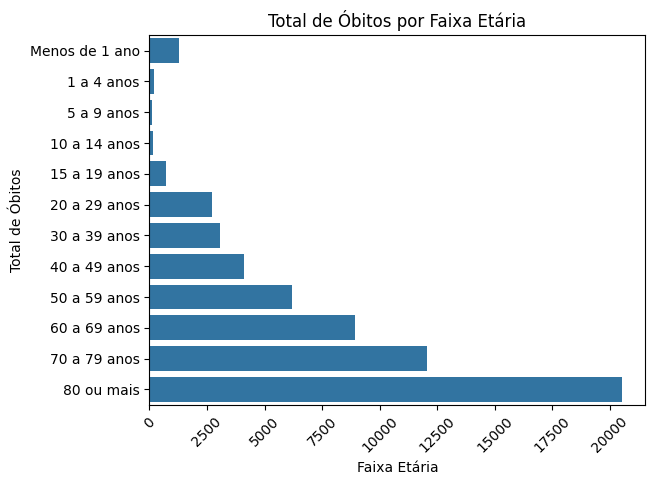

In [23]:
# ÓBITOS X FAIXA ETÁRIA

obitos_faixa_etaria = data.groupby("FAIXA_ETÁRIA")["QUANTIDADE"].sum().reset_index()

# Ordenar os dados pela faixa etária
ordem = [
    "Menos de 1 ano",
    "1 a 4 anos",
    "5 a 9 anos",
    "10 a 14 anos",
    "15 a 19 anos",
    "20 a 29 anos",
    "30 a 39 anos",
    "40 a 49 anos",
    "50 a 59 anos",
    "60 a 69 anos",
    "70 a 79 anos",
    "80 ou mais",
]
obitos_faixa_etaria["FAIXA_ETÁRIA"] = pd.Categorical(
    obitos_faixa_etaria["FAIXA_ETÁRIA"], categories=ordem, ordered=True
)
obitos_faixa_etaria = obitos_faixa_etaria[
    obitos_faixa_etaria["FAIXA_ETÁRIA"] != "Não informado"
]

sns.barplot(x="QUANTIDADE", y="FAIXA_ETÁRIA", data=obitos_faixa_etaria)
plt.title("Total de Óbitos por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Total de Óbitos")
plt.xticks(rotation=45)
plt.savefig("graficos/obitos_faixa_etaria.png", bbox_inches="tight")
plt.show()

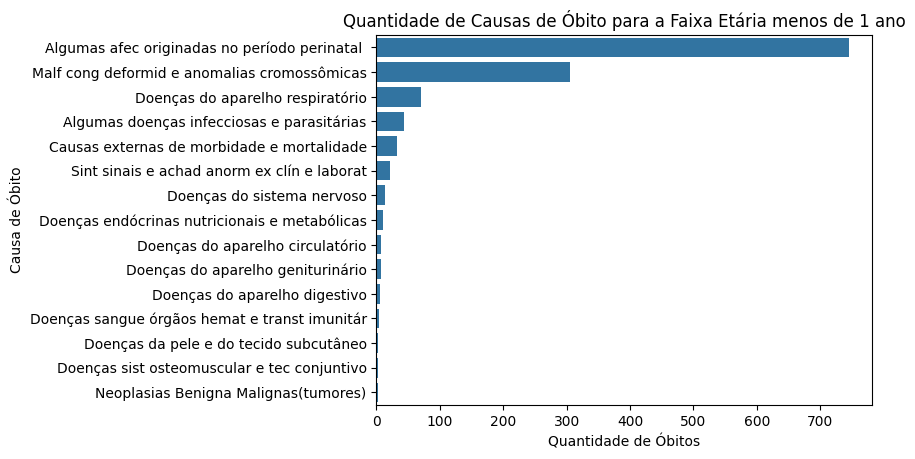

In [24]:
# CAUSA DAS MORTES DA FAIXA ETÁRIA DE MENOS DE 1 ANO
menos_1_ano = data[data["FAIXA_ETÁRIA"] == "Menos de 1 ano"]
causas_obitos = menos_1_ano["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Quantidade de Causas de Óbito para a Faixa Etária menos de 1 ano")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/obitos_menos_1_ano.png", bbox_inches="tight")
plt.show()

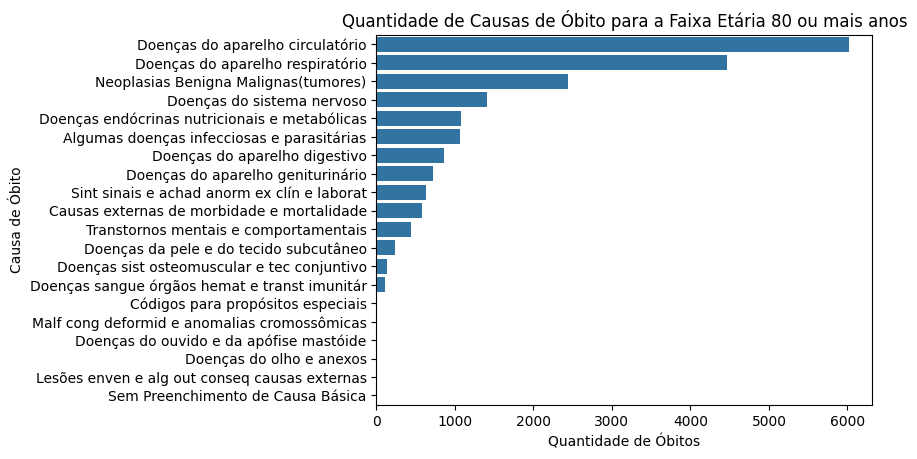

In [25]:
# CAUSA DAS MORTES DA FAIXA ETÁRIA DE 80 OU MAIS
mais_80 = data[data["FAIXA_ETÁRIA"] == "80 ou mais"]
causas_obitos = mais_80["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Quantidade de Causas de Óbito para a Faixa Etária 80 ou mais anos")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/obitos_80_mais.png", bbox_inches="tight")
plt.show()

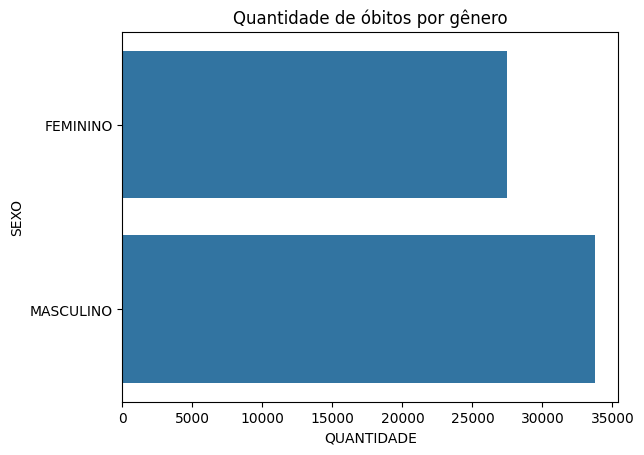

In [26]:
# ÓBITOS X SEXO
obitos_sexo = (
    data[data["SEXO"] != "Não Informado"]
    .groupby("SEXO")["QUANTIDADE"]
    .sum()
    .reset_index()
)
sns.barplot(x="QUANTIDADE", y="SEXO", data=obitos_sexo)
plt.title("Quantidade de óbitos por gênero")
plt.savefig("graficos/obitos_sexo.png", bbox_inches="tight")
plt.show()

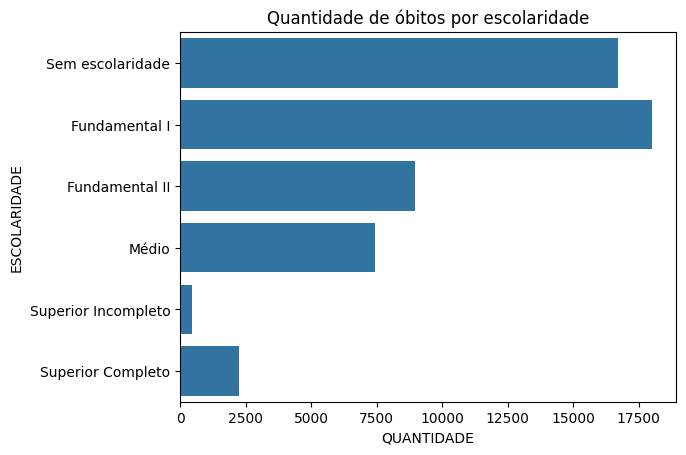

In [27]:
# ÓBITOS X ESCOLARIDADE
obitos_escolaridade = data.groupby("ESCOLARIDADE")["QUANTIDADE"].sum().reset_index()

ordem = [
    "Sem escolaridade",
    "Fundamental I",
    "Fundamental II",
    "Médio",
    "Superior Incompleto",
    "Superior Completo",
]
obitos_escolaridade["ESCOLARIDADE"] = pd.Categorical(
    obitos_escolaridade["ESCOLARIDADE"], categories=ordem, ordered=True
)
obitos_escolaridade = obitos_escolaridade[
    obitos_escolaridade["ESCOLARIDADE"] != "Ignorado"
]

sns.barplot(x="QUANTIDADE", y="ESCOLARIDADE", data=obitos_escolaridade)
plt.title("Quantidade de óbitos por escolaridade")
plt.savefig("graficos/obitos_escolaridade.png", bbox_inches="tight")
plt.show()

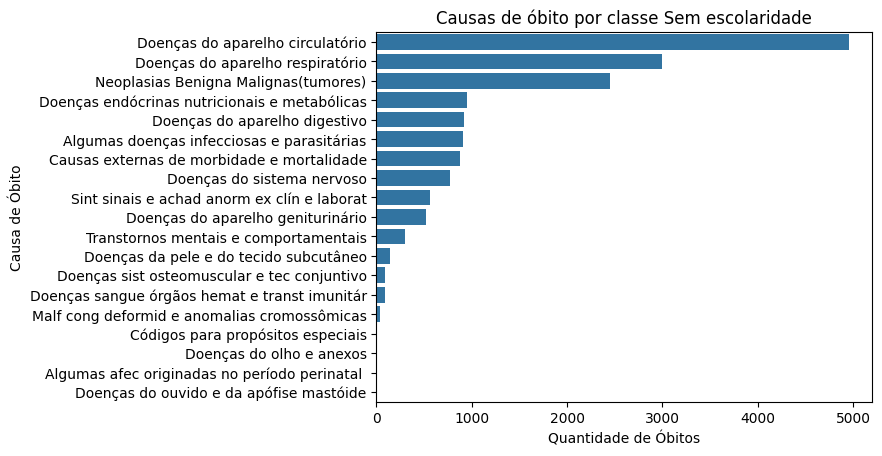

In [28]:
# CAUSA DAS MORTES SEM ESCOLARIDADE
df = data[data["ESCOLARIDADE"] == "Sem escolaridade"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por classe Sem escolaridade")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/sem_escolaridade.png", bbox_inches="tight")
plt.show()

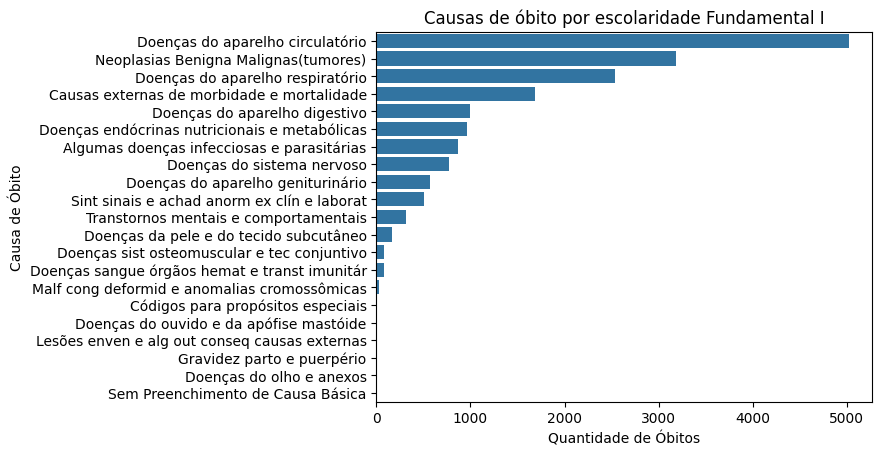

In [29]:
# CAUSA DAS MORTES FUNDAMENTAL I
df = data[data["ESCOLARIDADE"] == "Fundamental I"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por escolaridade Fundamental I")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/fundamental_I.png", bbox_inches="tight")
plt.show()

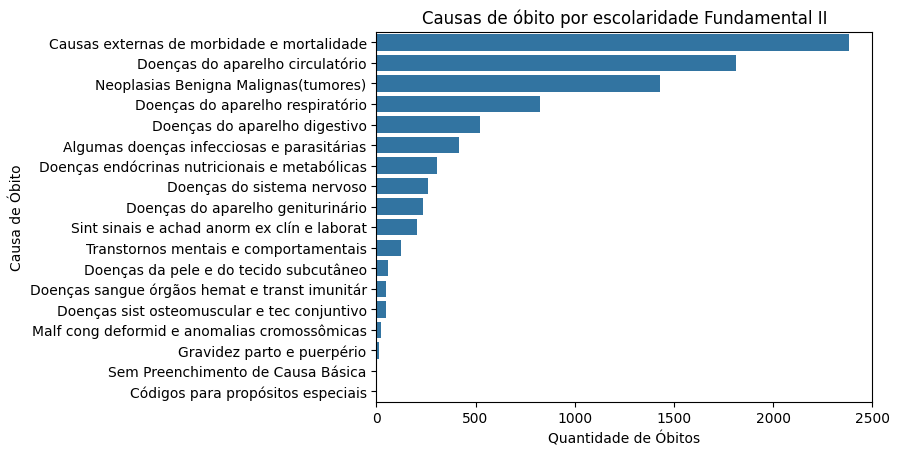

In [30]:
# CAUSA DAS MORTES FUNDAMENTAL II
df = data[data["ESCOLARIDADE"] == "Fundamental II"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por escolaridade Fundamental II")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/fundamental_II.png", bbox_inches="tight")
plt.show()

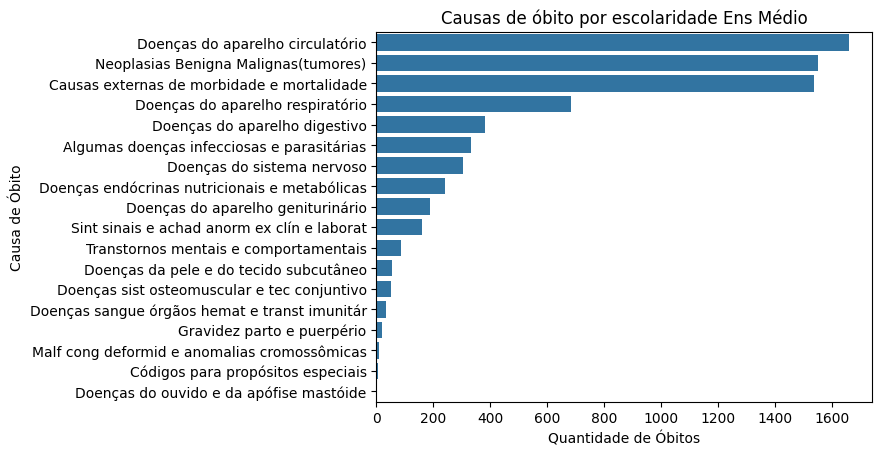

In [31]:
# CAUSA DAS MORTES ENS MÉDIO
df = data[data["ESCOLARIDADE"] == "Médio"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por escolaridade Ens Médio")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/ens_médio.png", bbox_inches="tight")
plt.show()

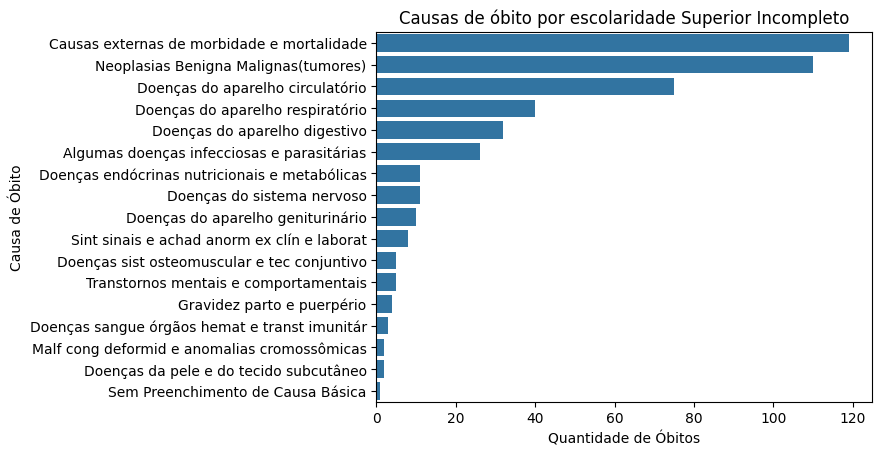

In [32]:
# CAUSA DAS MORTES ENS SUPERIOR INCOMPLETO
df = data[data["ESCOLARIDADE"] == "Superior Incompleto"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por escolaridade Superior Incompleto")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/sup_incompleto.png", bbox_inches="tight")
plt.show()

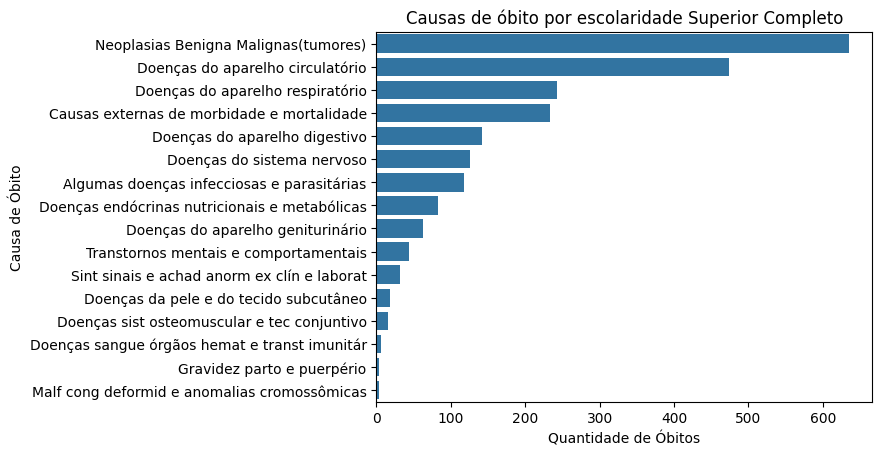

In [33]:
# CAUSA DAS MORTES ENS SUPERIOR
df = data[data["ESCOLARIDADE"] == "Superior Completo"]
causas_obitos = df["CID"].value_counts()
sns.barplot(x=causas_obitos.values, y=causas_obitos.index)
plt.title("Causas de óbito por escolaridade Superior Completo")
plt.xlabel("Quantidade de Óbitos")
plt.ylabel("Causa de Óbito")
plt.savefig("graficos/superior.png", bbox_inches="tight")
plt.show()

In [34]:
# PORCENTAGEM DE COMPOSIÇÃO POR CADA ESCOLARIDADE
contagem_escolaridade = data["ESCOLARIDADE"].value_counts()
porcentagem_escolaridade = (contagem_escolaridade / len(data)) * 100
print(porcentagem_escolaridade)

ESCOLARIDADE
Fundamental I          29.432142
Sem escolaridade       27.494530
Fundamental II         14.435126
Médio                  12.088112
Ignorado               12.071537
Superior Completo       3.709474
Superior Incompleto     0.769078
Name: count, dtype: float64


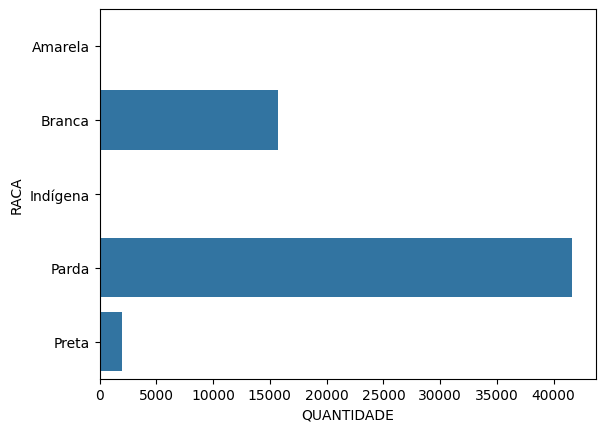

In [35]:
# ÓBITOS X RAÇA
obitos_raca = (
    data[data["RACA"] != "Não Informado"]
    .groupby("RACA")["QUANTIDADE"]
    .sum()
    .reset_index()
)
sns.barplot(x="QUANTIDADE", y="RACA", data=obitos_raca)
plt.savefig("graficos/obitos_raca.png", bbox_inches="tight")
plt.show()

In [36]:
# PORCENTAGEM DE COMPOSIÇÃO POR CADA RAÇA
contagem_racas = data["RACA"].value_counts()
porcentagem_racas = (contagem_racas / len(data)) * 100
print(porcentagem_racas)

RACA
Parda            67.841278
Branca           25.779023
Preta             3.343168
Não Informado     2.653650
Amarela           0.230392
Indígena          0.152490
Name: count, dtype: float64


In [37]:
# ANÁLISE ESTATÍSTICA
data["DATA_ÓBITO"] = pd.to_datetime(data["DATA_ÓBITO"])
data["ANO"] = data["DATA_ÓBITO"].dt.year
data["MÊS"] = data["DATA_ÓBITO"].dt.month

mortes_por_mes = data.groupby(["ANO", "MÊS"])["QUANTIDADE"].sum().reset_index()

print(mortes_por_mes)
print("Media:", np.mean(mortes_por_mes["QUANTIDADE"]))
print("Desvio padrão: ", np.std(mortes_por_mes["QUANTIDADE"]))
print("Mediana: ", statistics.median(mortes_por_mes["QUANTIDADE"]))

     ANO  MÊS  QUANTIDADE
0   2023    1        4965
1   2023    2        4495
2   2023    3        5417
3   2023    4        5761
4   2023    5        5613
5   2023    6        4952
6   2023    7        5239
7   2023    8        4979
8   2023    9        4858
9   2023   10        5201
10  2023   11        4901
11  2023   12        4853
Media: 5102.833333333333
Desvio padrão:  342.77952907890455
Mediana:  4972.0


In [38]:
# MÉDIA ETÁRIA
faixa_etaria_para_ponto_medio = {
    "Menos de 1 ano": 0.5,
    "1 a 4 anos": 2.5,
    "5 a 9 anos": 7,
    "10 a 14 anos": 12,
    "15 a 19 anos": 17,
    "20 a 29 anos": 24.5,
    "30 a 39 anos": 34.5,
    "40 a 49 anos": 44.5,
    "50 a 59 anos": 54.5,
    "60 a 69 anos": 64.5,
    "70 a 79 anos": 74.5,
    "80 ou mais": 80,  # Você pode escolher um valor representativo para esta faixa
    "Não informado": None,  # Você pode decidir como lidar com os valores não informados
}


data["PONTO_MÉDIO_FAIXA_ETÁRIA"] = data["FAIXA_ETÁRIA"].map(
    faixa_etaria_para_ponto_medio
)

print("Média etaria: ",data["PONTO_MÉDIO_FAIXA_ETÁRIA"].mean())

Média etaria:  63.67377657779278


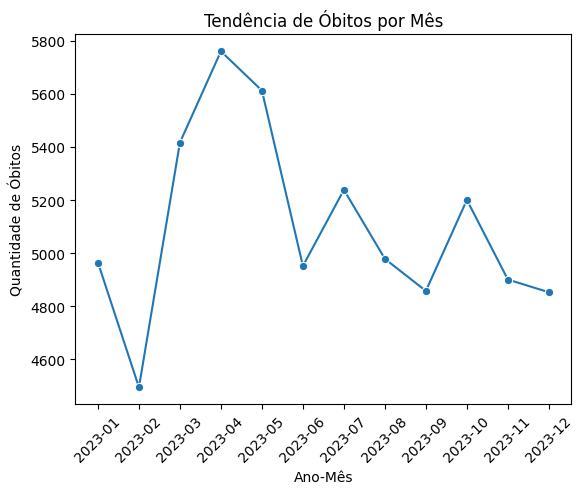

In [39]:
# TENDÊNCIA DE ÓBITOS POR MêS
data["DATA_ÓBITO"] = pd.to_datetime(data["DATA_ÓBITO"])
data["ANO"] = data["DATA_ÓBITO"].dt.year
data["MÊS"] = data["DATA_ÓBITO"].dt.month


# Agrupar por ano e mês e somar as mortes
obitos_por_mes = data.groupby(["ANO", "MÊS"])["QUANTIDADE"].sum().reset_index()

# Criar uma coluna 'ANO_MÊS' para facilitar a plotagem
obitos_por_mes["ANO_MÊS"] = (
    obitos_por_mes["ANO"].astype(str)
    + "-"
    + obitos_por_mes["MÊS"].astype(str).str.zfill(2)
)

# Criar o gráfico de tendência
sns.lineplot(x="ANO_MÊS", y="QUANTIDADE", data=obitos_por_mes, marker="o")
plt.title("Tendência de Óbitos por Mês")
plt.xlabel("Ano-Mês")
plt.ylabel("Quantidade de Óbitos")
plt.xticks(rotation=45)
plt.savefig("graficos/obitos_mês.png", bbox_inches="tight")
plt.show()